<a href="https://colab.research.google.com/github/Lotfullah21/Machine-Learning/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In Regression the relation between the response and predictors might not always be linear, in linear regression is a strong relationship between the label and the features, but when we consider multiple features there seems to be different relationhip between them, for exampe the realtion might be quadratic, exponential and so on. How to approach this kind of problem ?

We extend the linear model to accommodate noe-linear relationship using polynomial regression.

Residual plots are a useful graphical tool for identifying non-linearity Given a simple regression model, we can plot the residuals.

ei = (Y-Ypredicted), I deally the residual plot will show no discernible pattern, the presense of pattern may indicate a problem with some aspects of the linear model

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Download and explore the data set


In [2]:
#downloading dataset
!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

2022-05-29 11:36:23 URL:https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


From the above table , we can see clearly that there is not a strong relationship between the label (Value) and the predictor (year), we can explore more by plotting the data

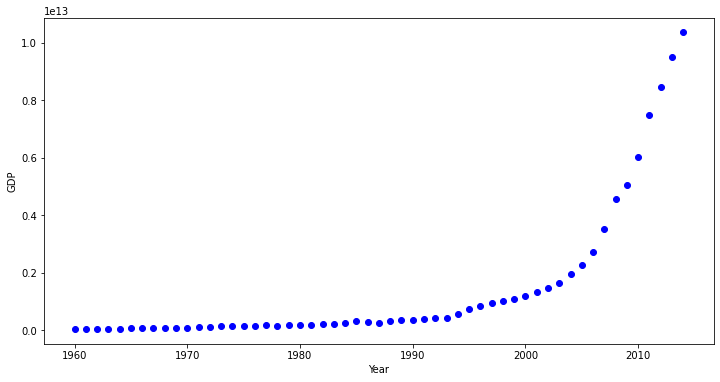

In [21]:

plt.figure(figsize=(12,6))
plt.plot(df["Year"].values,df['Value'].values,'bo')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

By looking into to above graph, we can say that it is an exponential graph, but still we will draw an exponential graph from scracth to see carfeully.

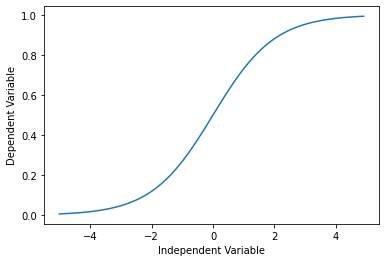

In [23]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

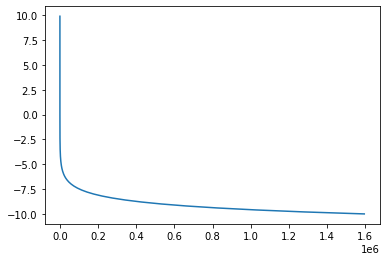

In [22]:
x = np.arange(-10,10,0.1)
y = 1/(np.power(3,x-3))
plt.plot(y,x)

## Choosing a model


From an initial look at the plot, we determine that the logistic function could be a good approximation,
since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:


The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{-\beta\_1(X-\beta\_2)}}$$

$\beta\_1$: Controls the curve's steepness,

$\beta\_2$: Slides the curve on the x-axis.


## Building the model

In [63]:
def sigmoid(x,beta_1,beta_2):
  return 1/(1+np.exp(-beta_1*(x-beta_2)))

## Can we fit our data in the above function ?

Text(0.5, 0, 'Year')

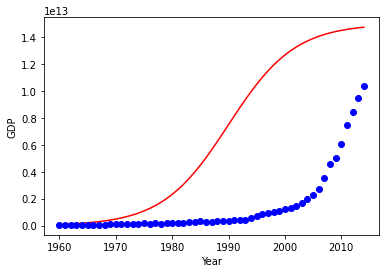

In [98]:
beta_1 = 0.1701
beta_2 = 1990
x = df["Year"].values
y = df["Value"].values
y_pred = sigmoid(x,beta_1,beta_2)
plt.plot(x,y_pred*15000004444444,'r')
plt.plot(df["Year"].values,df['Value'].values,'bo')
plt.ylabel('GDP')
plt.xlabel('Year')



Basically in our modeling, our task is to find the parameters to fit our data, after we find the proper model. 
in python we have curve_fit which uses non_linear least squares to fit our sigmoid function, to data.


In [114]:
# Lets normalize our data
x = df["Year"].values
y = df["Value"].values
x_data = x/max(x)
y_data = y/max(y)

print(x.shape,y.shape)

(55,) (55,)


In [134]:
from scipy.optimize import curve_fit
opt_param, pcov = curve_fit(sigmoid, x_data, y_data)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (opt_param[0], opt_param[1]))

 beta_1 = 690.453019, beta_2 = 0.997207


## Fit our data
By using the above optimized parameters will fit our data

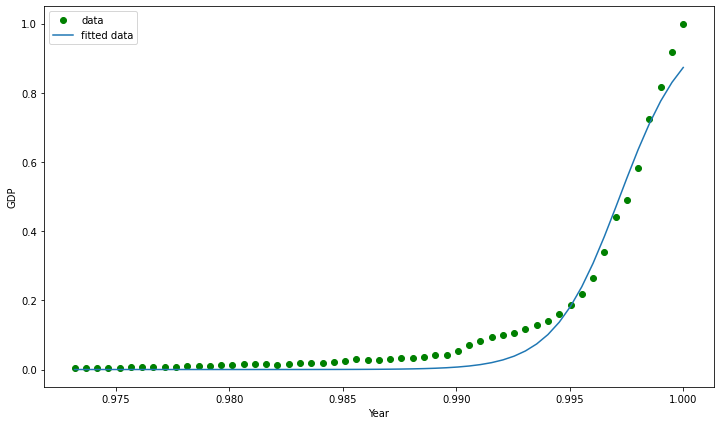

In [147]:

plt.figure(figsize = (12,7))
y = sigmoid(x_data,*opt_param)
plt.plot(x_data,y_data,'bo',label = "data",color="green")
plt.plot(x_data,y,label="fitted data")
plt.legend()
plt.xlabel("Year")
plt.ylabel('GDP')
plt.show()


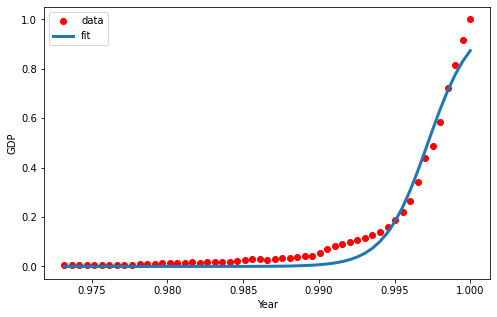

In [122]:
# Lets normalize our data
x = df["Year"].values
x_data = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x_data, *popt)
plt.plot(x_data, y_data, 'ro', label='data')
plt.plot(x_data,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Conclusion:
first we have gone through our data to see if there is non_linearity, then by observing few graphs we found approximately the best cureve to fit, but we did not had the parameters, by using curve_fit we were able to find the best parameters and hence found the best curve to fit our data

# Note: 
Sources: 
* IBM course: https://www.coursera.org/learn/machine-learning-with-python/home/welcome
* an introduction to statistical learning with application R (book)